In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import pickle
import re
import statsmodels.api as sm
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline


In [4]:
with open(r"./pickles/movie_DF_0428.p", "rb") as input_file:
    mov = pickle.load(input_file)

In [5]:
mov.shape

(5070, 20)

In [78]:
mov.columns

Index([                u'director',              u'distributor',
                   u'genre_bomojo',                   u'rating',
                          u'title',              u'releaseDate',
                         u'isCult',               u'canontitle',
                   u'num_theaters',                u'leadActor',
                   u'runtime_mins',              u'releaseYear',
                u'rev_opening_ADJ',       u'rev_totalGross_ADJ',
                u'prod_budget_ADJ',               u'CULT_INDEX',
       u'is_missing_prodbudgetADJ',                    u'genre',
                   u'directorTier',               u'studioTier'],
      dtype='object')

In [6]:
mov.set_index(mov.title, drop=True, inplace=True)

In [80]:
mov.drop(['director','title','isCult','rev_opening_ADJ','distributor','releaseDate','leadActor','releaseYear'],axis=1,inplace=True)

In [81]:
mov.columns

Index([                  u'rating',             u'runtime_mins',
                u'prod_budget_ADJ',               u'CULT_INDEX',
       u'is_missing_prodbudgetADJ',                    u'genre',
                   u'directorTier',               u'studioTier'],
      dtype='object')

In [55]:
mov.genre.unique()

array([u'Drama', u'Comedy', u'Romantic', u'Unknown', u'Romance',
       u'Foreign', u'Fantasy', u'Crime', u'Music', u'Horror', u'Thriller',
       u'War', u'Animation', u'Sci-Fi', u'Period', u'Action', u'Sports',
       u'Adventure', u'Family', u'Western'], dtype=object)

In [82]:
pickle.dump(mov, open('prelim_raw.p', 'wb'))

In [107]:
#generate dummies
dirdums=pd.get_dummies(mov.directorTier,prefix='dir')
#dirdums.drop('dir_OTHER',axis=1,inplace=True)
studiodums = pd.get_dummies(mov.studioTier,prefix='studio')
#studiodums.drop('studio_OTHER',axis=1,inplace=True)
ratingdums = pd.get_dummies(mov.rating,prefix='rating')
#ratingdums.drop('rating_GP',axis=1,inplace=True)
genredums = pd.get_dummies(mov.genre,prefix='genre')
#genredums.drop('genre_Unknown',axis=1,inplace=True)

In [108]:
raw = pd.concat([mov.loc[:,['CULT_INDEX','runtime_mins','prod_budget_ADJ','is_missing_prodbudgetADJ']],dirdums,studiodums,ratingdums,genredums],axis=1)

In [110]:
raw.shape

(5070, 40)

In [111]:
raw.iloc[:,1:40]

,runtime_mins,prod_budget_ADJ,is_missing_prodbudgetADJ,dir_INTERMEDIATE,dir_NOVICE,dir_OTHER,dir_SEASONED,studio_INTERMEDIATE,studio_NOVICE,studio_OTHER,...,genre_Music,genre_Period,genre_Romance,genre_Romantic,genre_Sci-Fi,genre_Sports,genre_Thriller,genre_Unknown,genre_War,genre_Western
title,,,,,,,,,,,,,,,,,,,,,
The Trip to Bountiful,108,5.650870e+06,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Breaking Away,100,2.428189e+07,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Modern Romance,93,3.629530e+06,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
After Hours,96,6.193309e+07,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Playing by Heart,121,2.857143e+07,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
Miracle,96,4.376399e+05,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Me and You and Everyone We Know,90,8.764058e+05,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
The Cremaster Cycle,182,1.320824e+05,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Party Monster,97,1.906715e+05,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [119]:
pickle.dump(raw, open('raw.p', 'wb'))

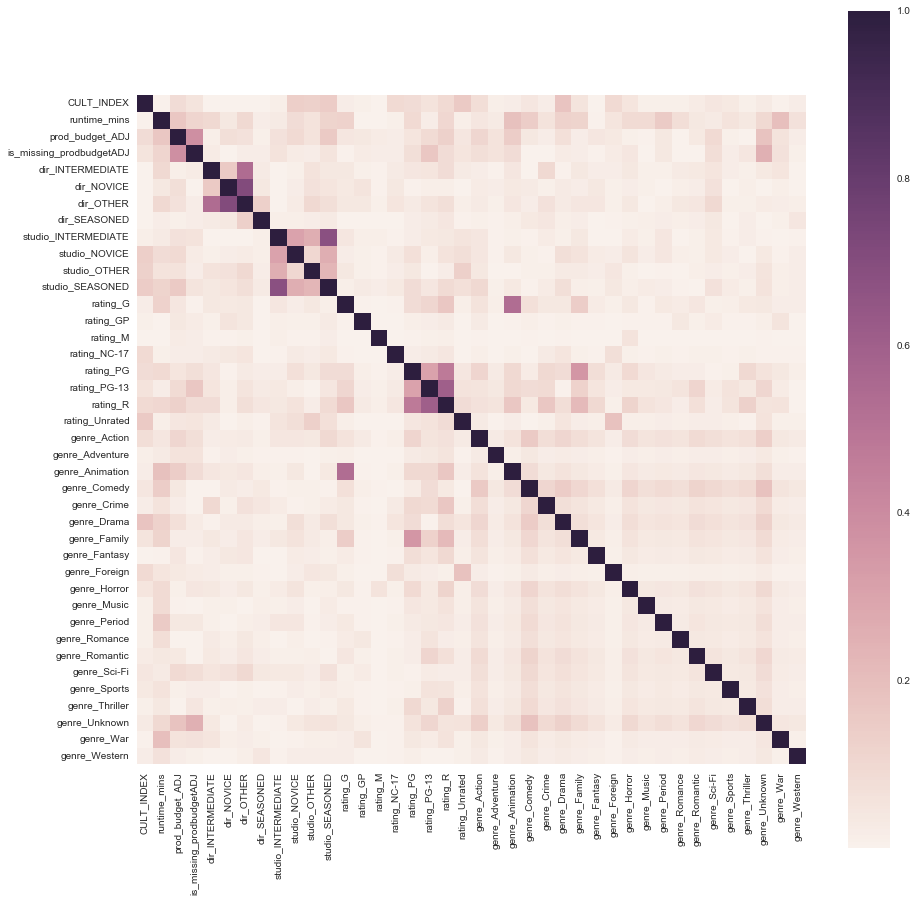

In [161]:
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap using seaborn
sns.heatmap(abs(raw.corr()), square=True)

In [171]:
#MULTICOLLINEAR FEATURES
#dir_NOVICE and dir_OTHER; dir_INTERMEDIATE with dir_OTHER
#studio_INTERMEDIATE with studio_SEASONED
#rating_G with genre_Animation
#rating_PG with genre_Family
#rating_PG13 with rating_R

#drop dir_NOVICE, studio_INTERMEDIATE, rating_G, rating_PG, rating_PG13
#raw.drop(['dir_NOVICE','studio_INTERMEDIATE','rating_G','rating_PG','rating_PG-13'],axis=1,inplace=True)
raw.drop(['rating_GP','rating_M','dir_OTHER'],axis=1,inplace=True)

In [172]:
raw.shape

(5070, 32)

In [187]:
#raw frame is ready. get test train
X_train, X_test, y_train, y_test = train_test_split(raw.iloc[:,1:32], raw.iloc[:,0], test_size=0.30, random_state=666)

#add an intercept to X_train and y_test
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

lm1 = sm.OLS(y_train,X_train)
fit1=lm1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:             CULT_INDEX   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     15.49
Date:                Fri, 29 Apr 2016   Prob (F-statistic):           4.87e-74
Time:                        06:29:15   Log-Likelihood:                 6153.2
No. Observations:                3549   AIC:                        -1.224e+04
Df Residuals:                    3518   BIC:                        -1.205e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
const                   

NameError: name 'fit1_1' is not defined

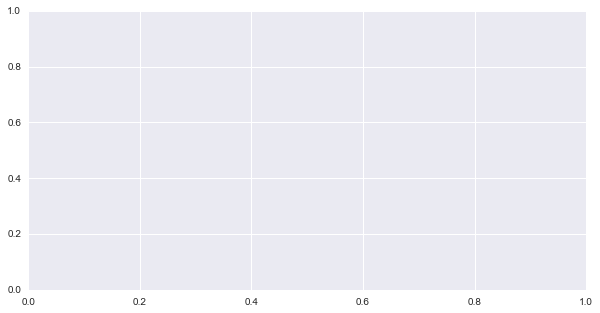

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
fig=sm.qqplot(fit1_1.resid, fit=True, line='s',ax=ax)

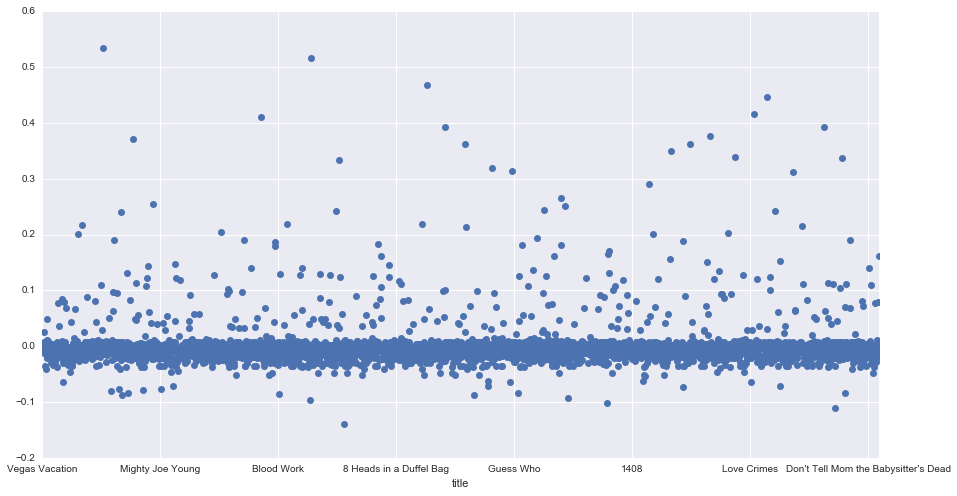

In [193]:
fit1_1.resid.plot(style='o',figsize=(15,8))

In [189]:
fit1.pvalues>0.05

const                       False
runtime_mins                 True
prod_budget_ADJ              True
is_missing_prodbudgetADJ     True
dir_INTERMEDIATE             True
dir_SEASONED                 True
studio_NOVICE               False
studio_OTHER                False
studio_SEASONED             False
rating_NC-17                False
rating_R                    False
rating_Unrated              False
genre_Action                False
genre_Adventure             False
genre_Animation             False
genre_Comedy                False
genre_Crime                 False
genre_Drama                 False
genre_Family                False
genre_Fantasy               False
genre_Foreign               False
genre_Horror                False
genre_Music                 False
genre_Period                False
genre_Romance               False
genre_Romantic              False
genre_Sci-Fi                False
genre_Sports                False
genre_Thriller              False
genre_Unknown 

In [280]:
raw.head(1)

,CULT_INDEX,runtime_mins,prod_budget_ADJ,is_missing_prodbudgetADJ,dir_INTERMEDIATE,dir_SEASONED,studio_NOVICE,studio_OTHER,studio_SEASONED,rating_NC-17,...,genre_War,genre_Western,dir_studio_SEASONED,dir_SEASONED_studio_NOVICE,dir_SEASONED_studio_OTHER,dir_INTERMEDIATE_studio_SEASONED,dir_INTERMEDIATE_studio_NOVICE,dir_SEASONED_genre_Crime,dir_INTERMEDIATE_genre_Sci-Fi,dir_INTERMEDIATE_genre_Crime
title,,,,,,,,,,,,,,,,,,,,,
Abandon,1.000229,99,33073929.9611,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
#okay, re-run without insignif. predictors
X_train, X_test, y_train, y_test = train_test_split(raw.iloc[:,6:40], raw.iloc[:,0], test_size=0.30, random_state=666)
#add an intercept to X_train and y_test
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
lm1_1 = sm.OLS(y_train,X_train)
fit1_1=lm1_1.fit()
print(fit1_1.summary())

                            OLS Regression Results                            
Dep. Variable:             CULT_INDEX   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     18.31
Date:                Fri, 29 Apr 2016   Prob (F-statistic):           9.61e-76
Time:                        06:29:47   Log-Likelihood:                 6149.7
No. Observations:                3549   AIC:                        -1.225e+04
Df Residuals:                    3523   BIC:                        -1.209e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               0.9587      0.002    6

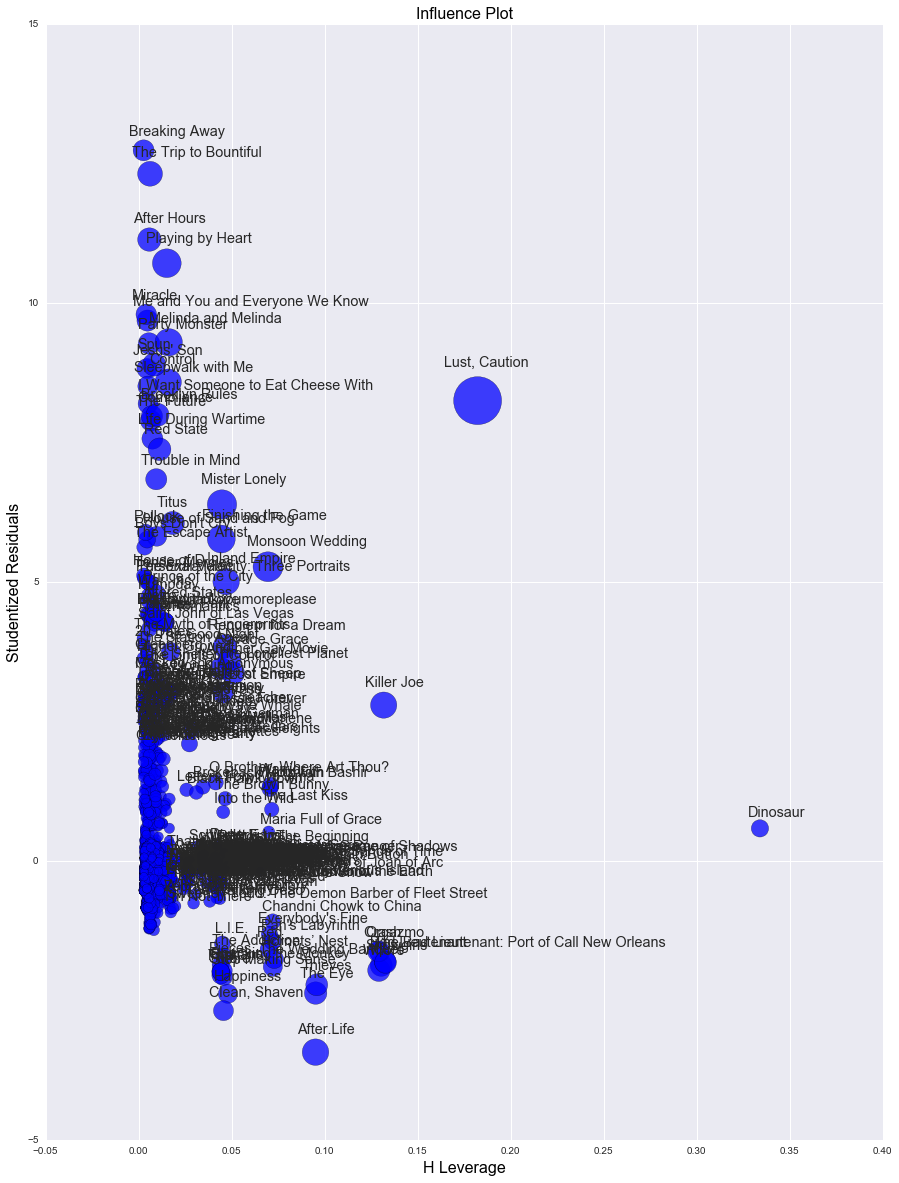

In [191]:
#drop all coeffs not significant
fig, ax = plt.subplots(figsize=(15,20))
fig = sm.graphics.influence_plot(fit1, ax=ax, criterion="cooks")

In [203]:
#removing outliers
raw=raw[~raw.index.isin(['Dinosaur','Killer Joe','Lust, Caution','Breaking Away', 'The Trip to Bountiful','Playing by Heart','Miracle','Me and You and Everyone We Know',
                  'Melinda and Melinda','Spun','Sleepwalk with Me','I Want Someone to Eat Cheese With','Brooklyn Rules','The Future','Life During Wartime',
                  'Red State','Trouble in Mind','Mister Lonely','Titus','Monsoon Wedding','Three Portraits','After Life','Clean, Shaven',
                  'Finishing the Game'])]

pred1 = fit1_1.predict(X_test)

pred1

array([ 0.99455712,  0.99866788,  1.00683114, ...,  1.02548923,
        1.03800978,  0.99869776])

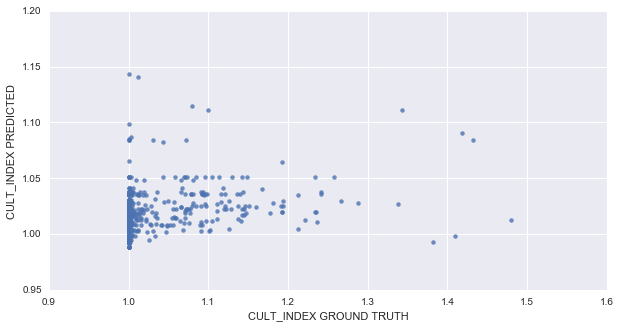

In [219]:
#plot predicted values versus ground truth values
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x=y_test, y=pred1, scatter=True,marker='o',fit_reg=False,ax=ax)
ax.plot(x=y_test,y=y_test,marker='r.',ls='r-')

plt.xlabel('CULT_INDEX GROUND TRUTH')
plt.ylabel('CULT_INDEX PREDICTED')


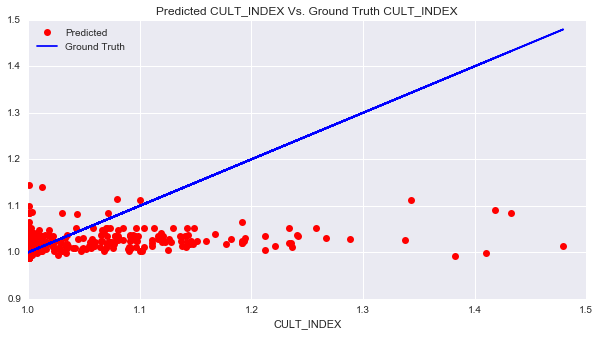

In [226]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(y_test, pred1, 'ro', label="Predicted")
ax.plot(y_test, y_test, 'b-', label="Ground Truth")
#ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
plt.title('Predicted CULT_INDEX Vs. Ground Truth CULT_INDEX')
plt.xlabel('CULT_INDEX')
ax.legend(loc="best")

In [227]:
raw.columns

Index([              u'CULT_INDEX',             u'runtime_mins',
                u'prod_budget_ADJ', u'is_missing_prodbudgetADJ',
               u'dir_INTERMEDIATE',             u'dir_SEASONED',
                  u'studio_NOVICE',             u'studio_OTHER',
                u'studio_SEASONED',             u'rating_NC-17',
                       u'rating_R',           u'rating_Unrated',
                   u'genre_Action',          u'genre_Adventure',
                u'genre_Animation',             u'genre_Comedy',
                    u'genre_Crime',              u'genre_Drama',
                   u'genre_Family',            u'genre_Fantasy',
                  u'genre_Foreign',             u'genre_Horror',
                    u'genre_Music',             u'genre_Period',
                  u'genre_Romance',           u'genre_Romantic',
                   u'genre_Sci-Fi',             u'genre_Sports',
                 u'genre_Thriller',            u'genre_Unknown',
                      u'g

In [250]:
#Second model is base + interactions

raw['dir_studio_SEASONED']=raw['dir_SEASONED']*raw['studio_SEASONED']
raw['dir_SEASONED_studio_NOVICE']=raw['dir_SEASONED']*raw['studio_NOVICE']
raw['dir_SEASONED_studio_OTHER']=raw['dir_SEASONED']*raw['studio_OTHER']

raw['dir_INTERMEDIATE_studio_SEASONED']=raw['dir_INTERMEDIATE']*raw['studio_SEASONED']
raw['dir_INTERMEDIATE_studio_NOVICE']=raw['dir_INTERMEDIATE']*raw['studio_NOVICE']

raw['dir_SEASONED_genre_Crime']=raw['dir_SEASONED']*raw['genre_Crime']
raw['dir_INTERMEDIATE_genre_Sci-Fi']=raw['dir_INTERMEDIATE']*raw['genre_Sci-Fi']
raw['dir_INTERMEDIATE_genre_Crime']=raw['dir_INTERMEDIATE']*raw['genre_Crime']








In [236]:
pickle.dump(raw, open('raw_interactions.p', 'wb'))

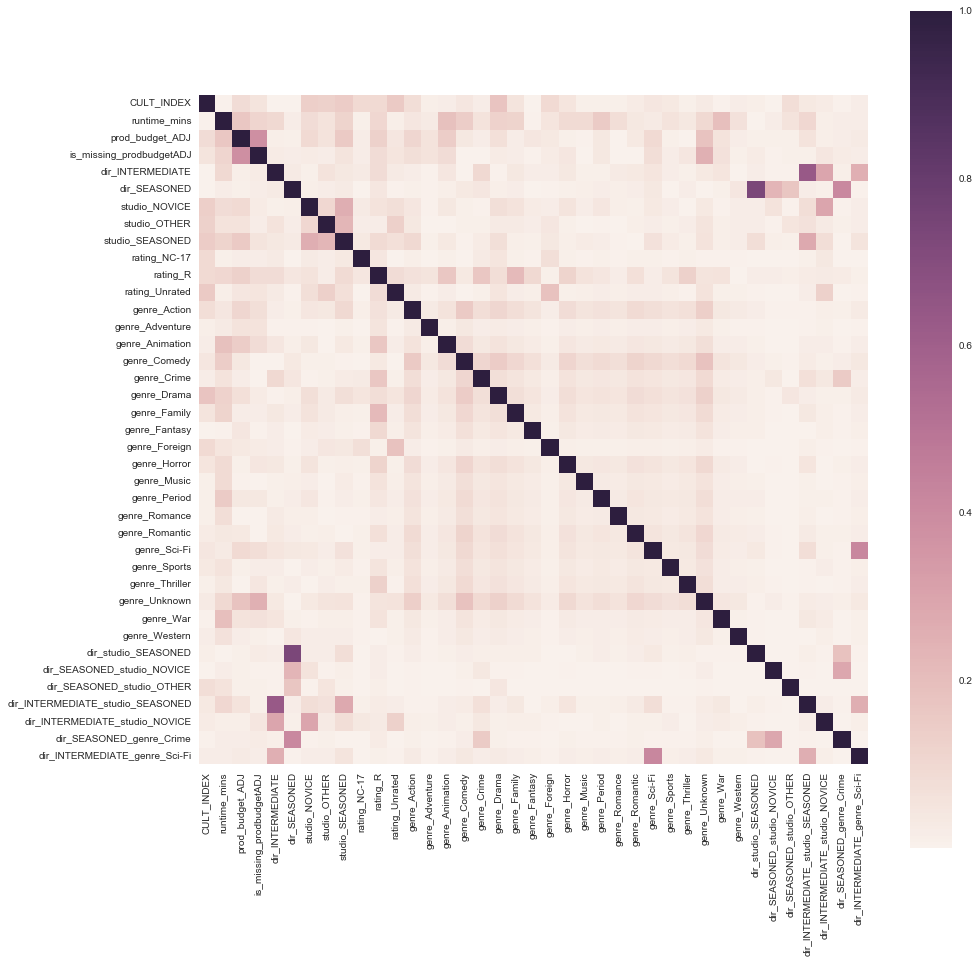

In [230]:
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap using seaborn
sns.heatmap(abs(raw.corr()), square=True)

In [288]:
raw.shape

(5070, 40)

In [279]:
raw.head(1)

,CULT_INDEX,runtime_mins,prod_budget_ADJ,is_missing_prodbudgetADJ,dir_INTERMEDIATE,dir_SEASONED,studio_NOVICE,studio_OTHER,studio_SEASONED,rating_NC-17,...,genre_War,genre_Western,dir_studio_SEASONED,dir_SEASONED_studio_NOVICE,dir_SEASONED_studio_OTHER,dir_INTERMEDIATE_studio_SEASONED,dir_INTERMEDIATE_studio_NOVICE,dir_SEASONED_genre_Crime,dir_INTERMEDIATE_genre_Sci-Fi,dir_INTERMEDIATE_genre_Crime
title,,,,,,,,,,,,,,,,,,,,,
Abandon,1.000229,99,33073929.9611,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
#raw frame is ready. get test train
X1_train, X1_test, y1_train, y1_test = train_test_split(raw.iloc[:,1:40], raw.iloc[:,0], test_size=0.3)

#add an intercept to X_train and y_test
X1_train=sm.add_constant(X1_train)
X1_test=sm.add_constant(X1_test)

lm2 = sm.OLS(y1_train,X1_train)
fit2=lm2.fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:             CULT_INDEX   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     13.05
Date:                Fri, 29 Apr 2016   Prob (F-statistic):           2.57e-73
Time:                        07:45:37   Log-Likelihood:                 6293.3
No. Observations:                3549   AIC:                        -1.251e+04
Df Residuals:                    3511   BIC:                        -1.228e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
runtime_

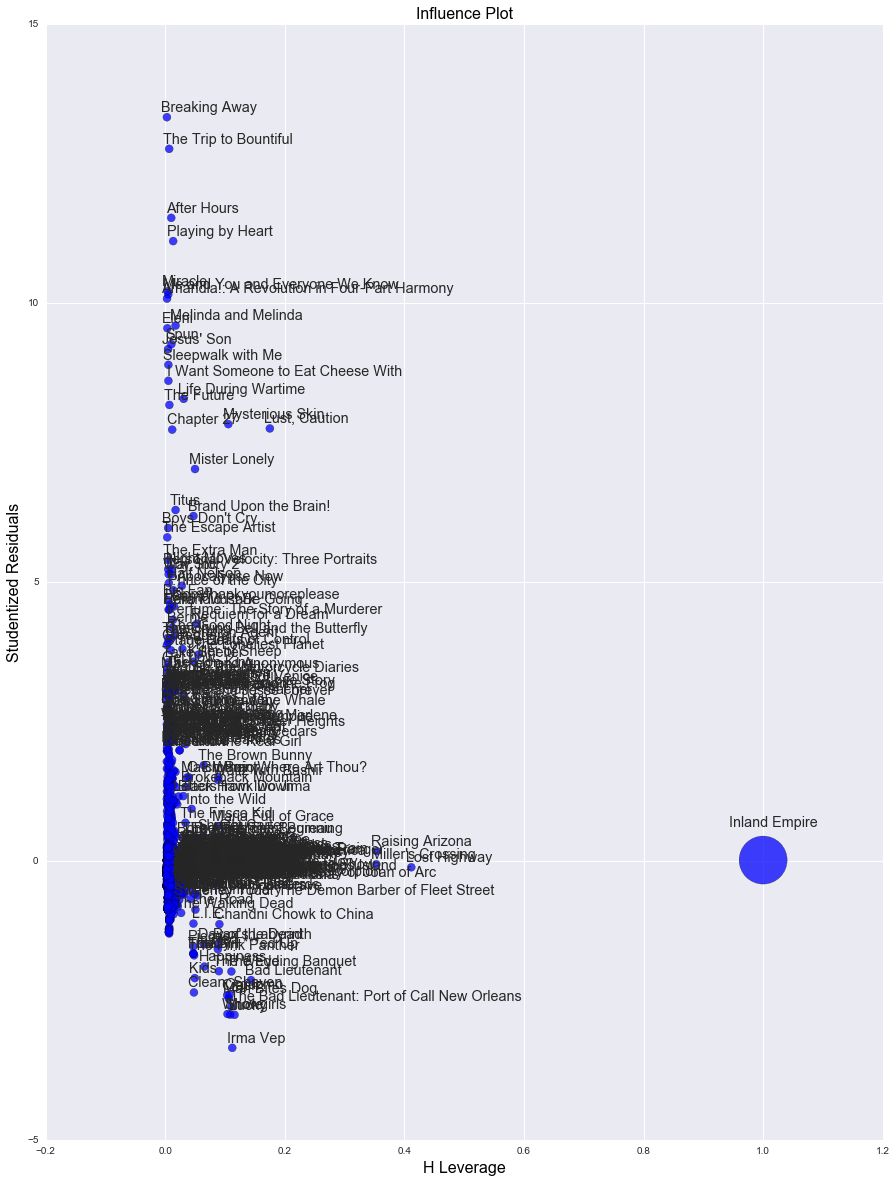

In [285]:
fig, ax = plt.subplots(figsize=(15,20))
fig = sm.graphics.influence_plot(fit2, ax=ax, criterion="cooks")

In [283]:
X1_test.shape

(1521, 39)

In [284]:
pred2 = fit2.predict(X1_test)

NameError: name 'fit2' is not defined

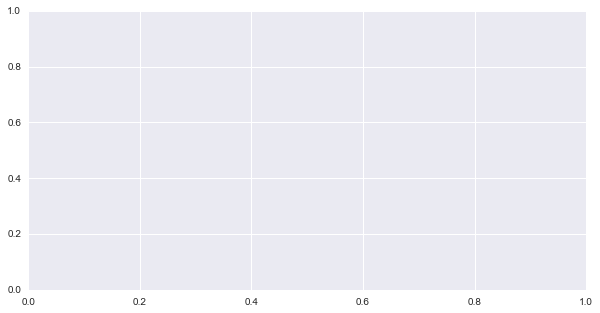

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
fig=sm.qqplot(fit2.resid, fit=True, line='s',ax=ax)

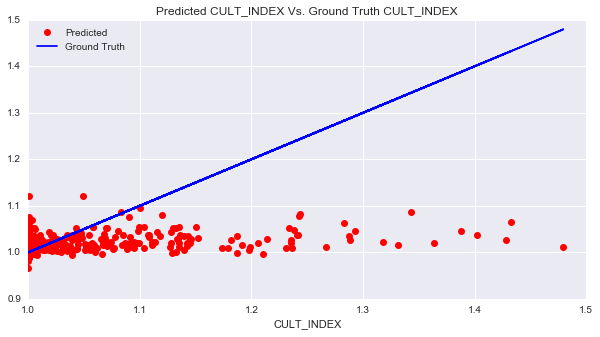

In [322]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(y1_test, pred2, 'ro', label="Predicted")
ax.plot(y1_test, y1_test, 'b-', label="Ground Truth")
#ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
plt.title('Predicted CULT_INDEX Vs. Ground Truth CULT_INDEX')
plt.xlabel('CULT_INDEX')
ax.legend(loc="best")

In [304]:
raw=raw.sort_index()

In [305]:
raw.shape

(5049, 40)

In [315]:
# THIRD TRY REMOVED OUTLIERS


#raw frame is ready. get test train
X2_train, X2_test, y2_train, y2_test = train_test_split(raw.iloc[:,1:40], raw.iloc[:,0], test_size=0.3)

#add an intercept to X_train and y_test
X2_train=sm.add_constant(X2_train)
X2_test=sm.add_constant(X2_test)

lm3 = sm.OLS(y2_train,X2_train)
fit3=lm3.fit()
print(fit3.summary())

                            OLS Regression Results                            
Dep. Variable:             CULT_INDEX   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     16.68
Date:                Fri, 29 Apr 2016   Prob (F-statistic):           6.59e-97
Time:                        12:26:20   Log-Likelihood:                 7029.5
No. Observations:                3534   AIC:                        -1.398e+04
Df Residuals:                    3496   BIC:                        -1.375e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
runtime_

In [328]:
X2_test.groupby(['distributor','genre']).groups()

KeyError: 'distributor'

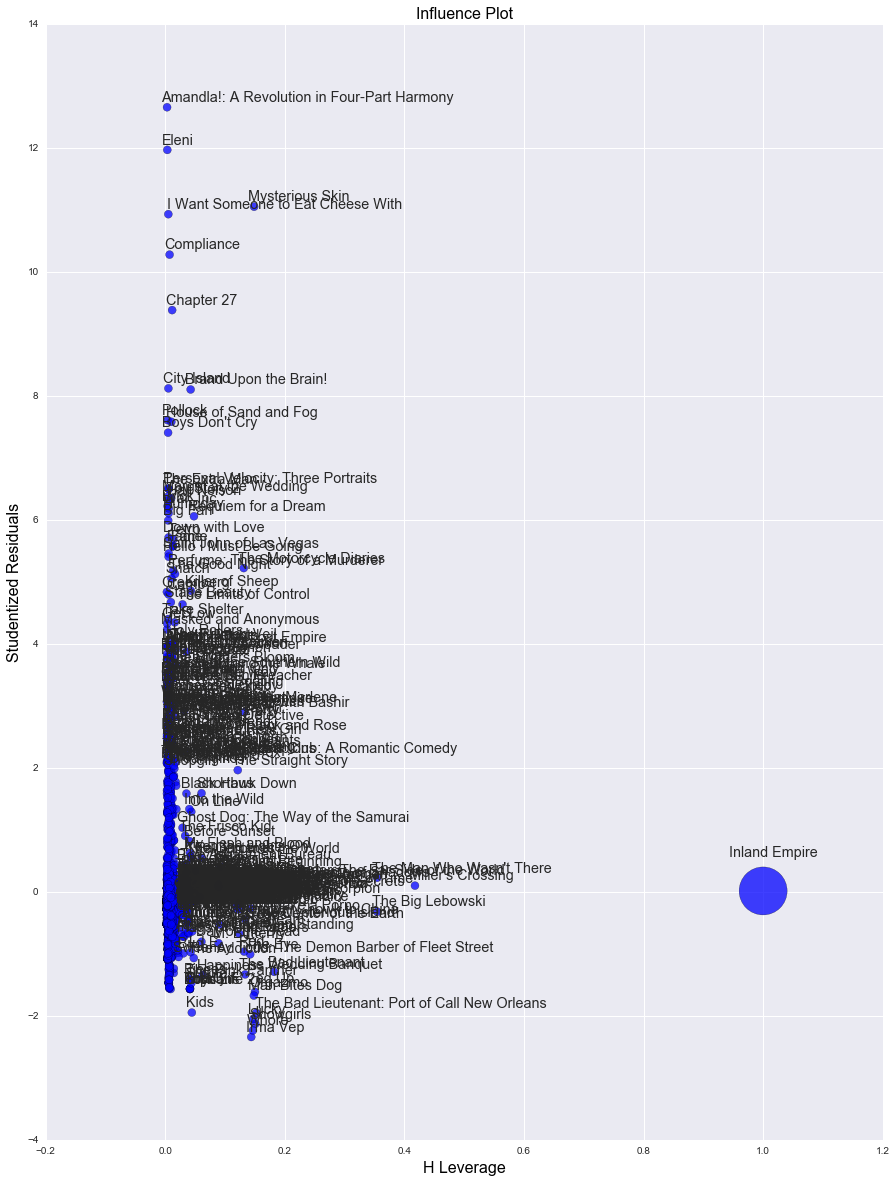

In [318]:
fig, ax = plt.subplots(figsize=(15,20))
fig = sm.graphics.influence_plot(fit3, ax=ax, criterion="cooks")

In [325]:
raw=raw[raw.index.isin(['Amandla!: A Revolution in Four Part Harmony','Eleni','Mysterious Skin','I Want Someone to Eat Cheese With',
                  'Compliance','Chapter 27','Inland Empire','Showgirls','Pollock'])]

In [326]:
raw.shape

(7, 40)

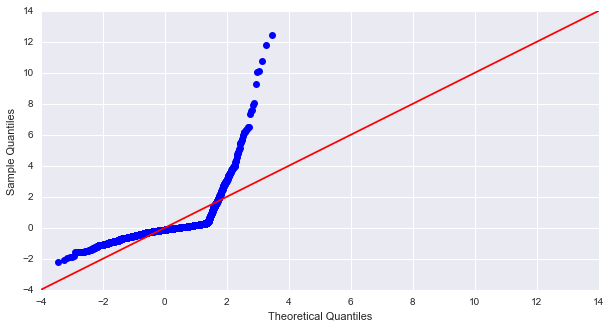

In [319]:
pred3 = fit3.predict(X2_test)
fig, ax = plt.subplots(figsize=(10,5))
fig=sm.qqplot(fit3.resid, fit=True, line='45',ax=ax)

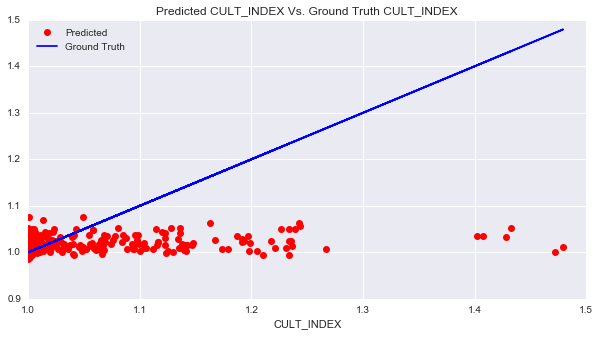

In [321]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(y2_test, pred3, 'ro', label="Predicted")
ax.plot(y2_test, y2_test, 'b-', label="Ground Truth")
#ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
plt.title('Predicted CULT_INDEX Vs. Ground Truth CULT_INDEX')
plt.xlabel('CULT_INDEX')
ax.legend(loc="best")